In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime 

In [2]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [3]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [4]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

In [5]:
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.players import get_active_players

# 2019-2020 League Leaders

In [6]:
ll_1 = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS', season='2019-20')
df_ll_1 = ll_1.get_data_frames()[0]
df_ll_1.head()
#Per game statistics
#I've taken a look at the league leaders of last season before draft

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201935,1,James Harden,HOU,68,36.5,9.9,22.3,0.444,4.4,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,34.3,32.6
1,203078,2,Bradley Beal,WAS,57,36.0,10.4,22.9,0.455,3.0,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,30.5,25.4
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,0.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9
3,1629027,4,Trae Young,ATL,60,35.3,9.1,20.8,0.437,3.4,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,29.6,26.6
4,203507,5,Giannis Antetokounmpo,MIL,63,30.4,10.9,19.7,0.553,1.4,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,29.5,34.6


In [7]:
df_ll_1['eFG%'] = (df_ll_1['FGM'] + 0.5 * df_ll_1['FG3M']) / df_ll_1['FGA']

In [8]:
df_ll_1['eFG%'] = df_ll_1['eFG%'].round(2)

In [9]:
df_ll_1 = df_ll_1.sort_values(by=['PTS', 'eFG%'], ascending=False)
#Sorted by PTS and eFG%

In [10]:
print('League Average 2019-20')
for cols in df_ll_1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll_1[cols].mean():.2f}')

League Average 2019-20
PLAYER_ID: 928477.02
RANK: 130.99
GP: 61.93
MIN: 25.26
FGM: 4.37
FGA: 9.48
FG_PCT: 0.46
FG3M: 1.34
FG3A: 3.69
FG3_PCT: 0.34
FTM: 1.95
FTA: 2.50
FT_PCT: 0.77
OREB: 1.01
DREB: 3.61
REB: 4.62
AST: 2.63
STL: 0.80
BLK: 0.50
TOV: 1.47
PTS: 12.02
EFF: 13.43
eFG%: 0.53


# 2020-2021 League Leaders

In [11]:
ll = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS')
df_ll = ll.get_data_frames()[0]
df_ll.head()
#Per game statistics

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203078,1,Bradley Beal,WAS,9,36.0,12.1,24.8,0.489,2.4,...,0.872,1.4,3.6,5.0,4.6,1.3,0.7,3.6,35.0,29.1
1,201939,2,Stephen Curry,GSW,10,34.1,8.9,20.6,0.432,4.2,...,0.957,0.8,4.4,5.2,6.7,1.1,0.2,3.2,28.6,26.6
2,203468,3,CJ McCollum,POR,9,34.0,9.9,21.0,0.471,4.9,...,0.879,0.3,3.6,3.9,5.0,1.7,0.3,1.2,27.9,26.0
3,203897,4,Zach LaVine,CHI,11,35.2,9.7,19.8,0.491,3.3,...,0.887,0.3,4.8,5.1,4.6,1.3,0.6,4.1,27.7,24.5
4,203507,5,Giannis Antetokounmpo,MIL,9,31.3,9.7,18.3,0.527,1.3,...,0.624,1.8,8.8,10.6,5.2,1.2,0.9,3.3,27.1,29.1


In [12]:
df_ll.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

In [13]:
df_ll['eFG%'] = (df_ll['FGM'] + 0.5 * df_ll['FG3M']) / df_ll['FGA']

In [14]:
df_ll['eFG%'] = df_ll['eFG%'].round(2)

In [15]:
df_ll = df_ll.sort_values(by=['PTS', 'eFG%'], ascending=False)

In [16]:
print('League Average 2020-2021')
for cols in df_ll.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll[cols].mean():.2f}')

League Average 2020-2021
PLAYER_ID: 995821.77
RANK: 140.74
GP: 9.11
MIN: 24.27
FGM: 4.16
FGA: 9.00
FG_PCT: 0.46
FG3M: 1.30
FG3A: 3.53
FG3_PCT: 0.32
FTM: 1.76
FTA: 2.29
FT_PCT: 0.73
OREB: 0.98
DREB: 3.57
REB: 4.56
AST: 2.50
STL: 0.79
BLK: 0.50
TOV: 1.43
PTS: 11.36
EFF: 12.90
eFG%: 0.54


# After draft

In [17]:
players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Anthony Edwards']
#This is my team after draft

df_ll_1['Fantasy_team'] = 'N'

for player in df_ll_1.loc[: ,'PLAYER']:
    if player in players:
        df_ll_1.loc[df_ll_1[df_ll_1['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [18]:
df_ll_1.loc[df_ll_1.Fantasy_team == 'Y'] #My players in 2019-20 season
#Where is Jusuf Nurkic and Thomas Bryant? Anthony Edwards has been drafted in 2020. 

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9,0.57,Y
15,1626156,16,D'Angelo Russell,MIN,45,32.3,8.0,18.8,0.426,3.5,...,3.6,3.9,6.3,1.1,0.3,3.3,23.1,19.8,0.52,Y
31,202699,32,Tobias Harris,PHI,72,34.3,7.7,16.3,0.471,1.8,...,5.9,6.9,3.2,0.7,0.6,1.4,19.6,20.3,0.53,Y
38,203471,39,Dennis Schroder,OKC,65,30.8,7.0,14.8,0.469,1.9,...,3.3,3.6,4.0,0.7,0.2,2.6,18.9,16.5,0.54,Y
63,1628389,64,Bam Adebayo,MIA,72,33.6,6.1,11.0,0.557,0.0,...,7.8,10.2,5.1,1.1,1.3,2.8,15.9,24.3,0.55,Y
74,203115,75,Will Barton,DEN,58,33.0,5.7,12.7,0.450,1.9,...,5.0,6.3,3.7,1.1,0.5,1.5,15.1,17.5,0.52,Y
92,203935,93,Marcus Smart,BOS,60,32.0,4.3,11.4,0.375,2.3,...,3.1,3.8,4.9,1.7,0.5,1.7,12.9,14.5,0.48,Y
108,201143,109,Al Horford,PHI,67,30.2,4.8,10.6,0.450,1.5,...,5.3,6.8,4.0,0.8,0.9,1.2,11.9,17.1,0.52,Y
127,1629629,128,Cam Reddish,ATL,58,26.7,3.7,9.6,0.384,1.4,...,3.1,3.7,1.5,1.1,0.5,1.7,10.5,9.3,0.46,Y
155,1628464,156,Daniel Theis,BOS,65,24.1,3.7,6.6,0.566,0.5,...,4.4,6.6,1.7,0.6,1.3,0.8,9.2,15.3,0.60,Y


In [19]:
for player in df_ll.loc[: ,'PLAYER']:
    if player in players:
        df_ll.loc[df_ll[df_ll['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [20]:
df_ll_fant_team = df_ll.loc[df_ll.Fantasy_team == 'Y']
df_ll_fant_team #My players in 2020-21 season

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
7,203081,8,Damian Lillard,POR,9,34.4,8.1,18.8,0.432,3.8,...,4.4,4.7,6.6,0.9,0.2,2.4,26.4,25.0,0.53,Y
33,1626156,34,D'Angelo Russell,MIN,10,31.0,7.5,17.4,0.431,2.9,...,2.7,3.2,5.2,1.2,0.4,3.3,20.3,16.0,0.51,Y
42,202699,43,Tobias Harris,PHI,9,32.9,7.6,14.9,0.507,2.3,...,6.4,7.9,3.1,1.1,1.0,2.2,19.0,22.2,0.59,Y
50,1628389,51,Bam Adebayo,MIA,8,30.4,6.5,10.1,0.642,0.0,...,7.9,9.0,5.0,1.0,1.0,3.4,17.4,25.3,0.64,Y
71,1628418,72,Thomas Bryant,WAS,10,27.1,5.9,9.1,0.648,0.9,...,4.3,6.1,1.5,0.4,0.8,1.1,14.3,18.0,0.70,Y
72,203471,73,Dennis Schroder,LAL,11,31.4,5.5,12.9,0.423,1.2,...,3.7,4.1,5.0,0.8,0.3,2.5,14.3,13.8,0.47,Y
81,1630162,82,Anthony Edwards,MIN,10,25.5,5.2,13.4,0.388,1.6,...,1.9,2.9,2.0,0.6,0.2,2.0,13.6,8.6,0.45,Y
102,203935,101,Marcus Smart,BOS,9,33.4,3.4,9.8,0.352,1.9,...,2.1,2.8,6.4,1.6,0.7,1.8,12.2,14.6,0.44,Y
116,1629629,117,Cam Reddish,ATL,9,29.0,3.8,10.9,0.347,1.6,...,3.9,4.6,1.3,1.4,0.2,1.7,11.6,9.8,0.42,Y
118,201143,119,Al Horford,OKC,8,26.9,4.5,10.6,0.424,2.0,...,6.5,7.1,2.4,0.4,0.8,1.0,11.3,14.5,0.52,Y


In [21]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [22]:
player_ids = list(df_ll_fant_team.PLAYER_ID)
game_ids = []

for ids in player_ids:
    df = CumeStatsPlayerGames(player_id=ids, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season').get_data_frames()[0]
    game_ids.append(df)
game_ids = pd.concat(game_ids)
time.sleep(2)

In [23]:
game_ids.index = range(0,len(game_ids))

In [24]:
game_ids['MATCHUP_DATE'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_DATE'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][0]

In [25]:
game_ids['MATCHUP_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_TEAM'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][1:]

In [26]:
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.MATCHUP_TEAM.iloc[i] = ' '.join(game_ids.MATCHUP_TEAM.iloc[i])

In [27]:
game_ids = game_ids.drop(labels='MATCHUP', axis=1)

In [28]:
game_ids['HOME_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.HOME_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[1]

In [29]:
game_ids['AWAY_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.AWAY_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[0]

In [30]:
game_ids = game_ids.drop('MATCHUP_TEAM', axis=1)
game_ids

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000140,01/09/2021,Kings,Trail Blazers
1,0022000122,01/07/2021,Trail Blazers,Timberwolves
2,0022000106,01/05/2021,Trail Blazers,Bulls
3,0022000092,01/03/2021,Warriors,Trail Blazers
4,0022000078,01/01/2021,Warriors,Trail Blazers
...,...,...,...,...
117,0022000056,12/30/2020,Celtics,Grizzlies
118,0022000048,12/29/2020,Pacers,Celtics
119,0022000037,12/27/2020,Pacers,Celtics
120,0022000007,12/25/2020,Celtics,Nets


In [31]:
game_ids.HOME_TEAM = game_ids.HOME_TEAM.str.replace(' ', '')

In [32]:
game_ids.AWAY_TEAM = game_ids.AWAY_TEAM.str.replace(' ', '')

In [33]:
game_ids.loc[game_ids.HOME_TEAM == 'He', 'HOME_TEAM'] = 'Heat'

In [34]:
game_ids[game_ids.HOME_TEAM == '']

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
28,0022000136,01/09/2021,,He
31,0022000071,01/01/2021,,He
35,0022000012,12/23/2020,,He
36,0022000136,01/09/2021,,He


In [35]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog

In [36]:
lgl = LeagueGameLog()

In [37]:
df_lgl = lgl.get_data_frames()[0]

In [38]:
df_lgl.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [39]:
df_lgl[df_lgl.GAME_ID == '0022000071']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
136,22020,1610612742,DAL,Dallas Mavericks,0022000071,2021-01-01,DAL vs. MIA,W,240,32,...,45,49,18,9,3,17,25,93,10,1
137,22020,1610612748,MIA,Miami Heat,0022000071,2021-01-01,MIA @ DAL,L,240,29,...,36,41,20,10,2,16,24,83,-10,1


In [40]:
game_ids.loc[game_ids.GAME_ID == '0022000071', 'HOME_TEAM'] = 'Mavericks'

In [41]:
df_lgl[df_lgl.GAME_ID == '0022000012']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
4,22020,1610612753,ORL,Orlando Magic,0022000012,2020-12-23,ORL vs. MIA,W,240,42,...,30,41,23,15,3,18,19,113,6,1
5,22020,1610612748,MIA,Miami Heat,0022000012,2020-12-23,MIA @ ORL,L,240,42,...,36,43,25,11,2,22,21,107,-6,1


In [42]:
game_ids.loc[game_ids.GAME_ID == '0022000012', 'HOME_TEAM'] = 'Magic'

In [43]:
game_ids.loc[game_ids.AWAY_TEAM == 'He', 'AWAY_TEAM'] = 'Heat'

In [44]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [50]:
new_data = []
for i in list(game_ids.GAME_ID):
    df = BoxScoreTraditionalV2(game_id=i).get_data_frames()[0]
    new_data.append(df)
new_data = pd.concat(new_data)
time.sleep(2)

In [51]:
new_data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022000140,1610612757,POR,Portland,1627884,Derrick Jones Jr.,F,,20:33,4.0,...,0.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,9.0,32.0
1,0022000140,1610612757,POR,Portland,203496,Robert Covington,F,,27:34,2.0,...,0.0,8.0,8.0,4.0,1.0,0.0,0.0,1.0,6.0,34.0
2,0022000140,1610612757,POR,Portland,203994,Jusuf Nurkic,C,,23:15,4.0,...,2.0,6.0,8.0,5.0,3.0,1.0,2.0,2.0,10.0,25.0
3,0022000140,1610612757,POR,Portland,203468,CJ McCollum,G,,29:19,13.0,...,0.0,3.0,3.0,3.0,2.0,0.0,1.0,3.0,37.0,26.0
4,0022000140,1610612757,POR,Portland,203081,Damian Lillard,G,,29:40,5.0,...,0.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,17.0,26.0


In [52]:
df_inner_join = pd.merge(new_data, game_ids, on='GAME_ID', how='inner')

In [53]:
df_inner_join.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000140,1610612757,POR,Portland,1627884,Derrick Jones Jr.,F,,20:33,4.0,...,0.0,1.0,1.0,1.0,2.0,9.0,32.0,01/09/2021,Kings,TrailBlazers
1,0022000140,1610612757,POR,Portland,1627884,Derrick Jones Jr.,F,,20:33,4.0,...,0.0,1.0,1.0,1.0,2.0,9.0,32.0,01/09/2021,Kings,TrailBlazers
2,0022000140,1610612757,POR,Portland,203496,Robert Covington,F,,27:34,2.0,...,4.0,1.0,0.0,0.0,1.0,6.0,34.0,01/09/2021,Kings,TrailBlazers
3,0022000140,1610612757,POR,Portland,203496,Robert Covington,F,,27:34,2.0,...,4.0,1.0,0.0,0.0,1.0,6.0,34.0,01/09/2021,Kings,TrailBlazers
4,0022000140,1610612757,POR,Portland,203994,Jusuf Nurkic,C,,23:15,4.0,...,5.0,3.0,1.0,2.0,2.0,10.0,25.0,01/09/2021,Kings,TrailBlazers


In [54]:
df_inner_join = df_inner_join.drop_duplicates()
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE', ascending=False)

In [55]:
df_inner_join['MATCHUP_DATE'] = pd.to_datetime(df_inner_join.MATCHUP_DATE)

In [56]:
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE')

In [57]:
df_inner_join.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM'],
      dtype='object')

In [58]:
df_inner_join_fant = df_inner_join[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 
                                    'START_POSITION', 'COMMENT', 'MIN', 'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 
                                    'STL', 'BLK', 'TO', 'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM']]
df_inner_join_fant
#Dataframe of my players' games.
#Parameters are the ones considered in fantasy game.
#'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO'

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FG_PCT,...,FG3M,PTS,REB,AST,STL,BLK,TO,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
4550,0022000002,1610612746,LAC,LA,1629599,Amir Coffey,,,0:57,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
4559,0022000002,1610612747,LAL,Los Angeles,1628398,Kyle Kuzma,,,26:38,0.545,...,1.0,15.0,1.0,0.0,0.0,0.0,2.0,2020-12-22,Lakers,Clippers
4558,0022000002,1610612747,LAL,Los Angeles,202083,Wesley Matthews,,,11:06,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020-12-22,Lakers,Clippers
4561,0022000002,1610612747,LAL,Los Angeles,1627936,Alex Caruso,,,16:40,0.200,...,1.0,3.0,2.0,1.0,0.0,0.0,3.0,2020-12-22,Lakers,Clippers
4560,0022000002,1610612747,LAL,Los Angeles,202693,Markieff Morris,,,19:00,0.333,...,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2020-12-22,Lakers,Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0022000147,1610612750,MIN,Minnesota,1627736,Malik Beasley,G,,35:19,0.500,...,3.0,24.0,3.0,0.0,0.0,0.0,0.0,2021-01-10,Timberwolves,Spurs
5785,0022000144,1610612743,DEN,Denver,1630192,Zeke Nnaji,,,3:44,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021-01-10,Knicks,Nuggets
5786,0022000144,1610612743,DEN,Denver,1629626,Bol Bol,,,3:44,1.000,...,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2021-01-10,Knicks,Nuggets
1387,0022000147,1610612759,SAS,San Antonio,1628966,Keita Bates-Diop,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-10,Timberwolves,Spurs


In [59]:
df_inner_join_fant.index = range(0, len(df_inner_join_fant))

In [60]:
players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Bismack Biyombo']
#Anthony Edwards out, Bismack Biyombo in

Damian Lillard


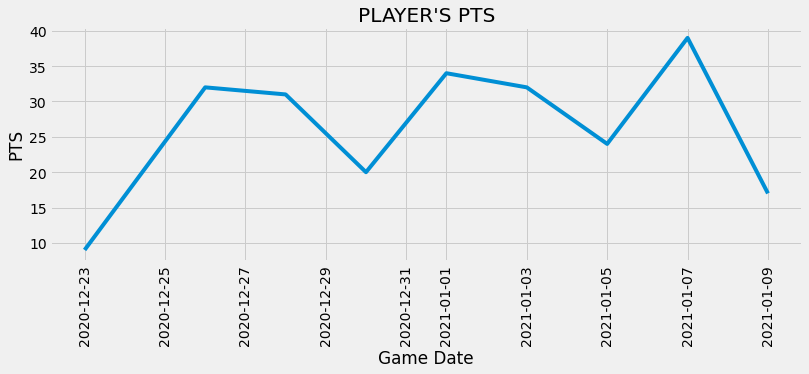

D'Angelo Russell


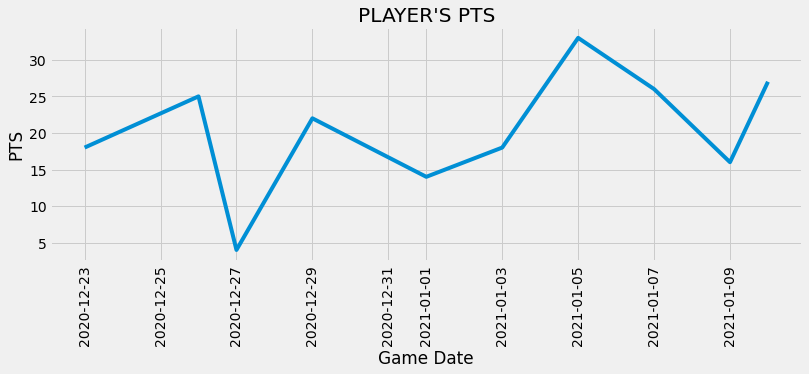

Marcus Smart


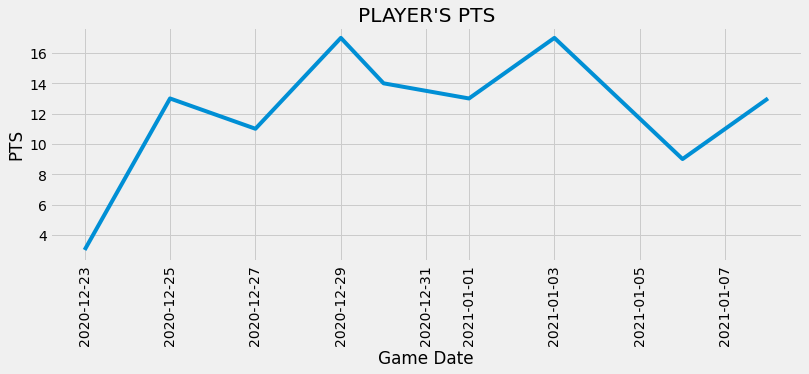

Tobias Harris


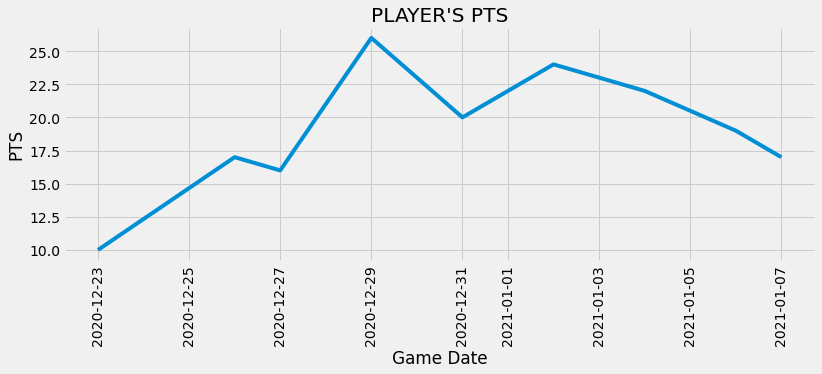

Bam Adebayo


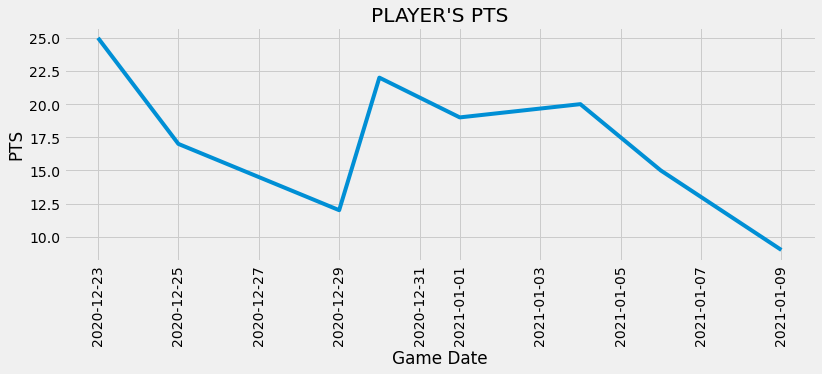

Al Horford


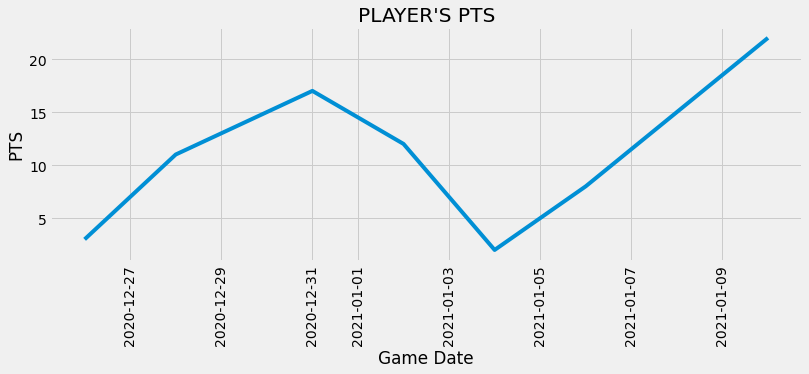

Jusuf Nurkic


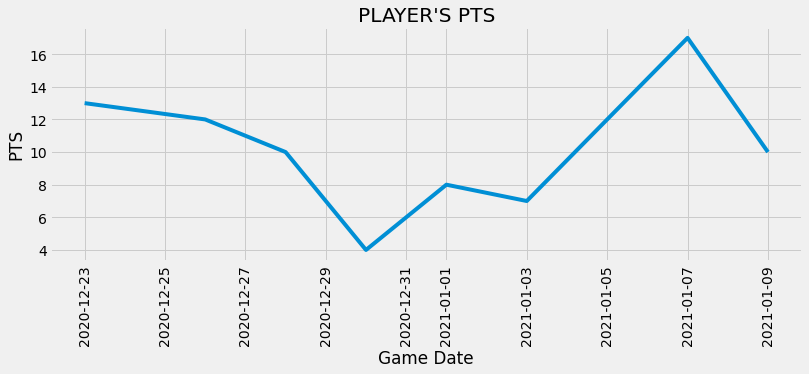

Thomas Bryant


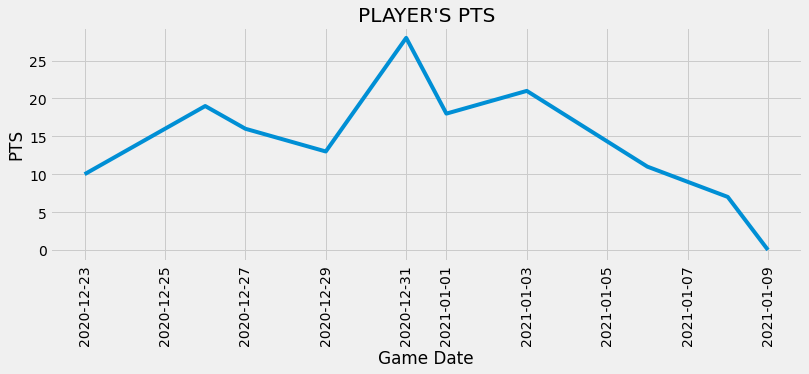

Dennis Schroder


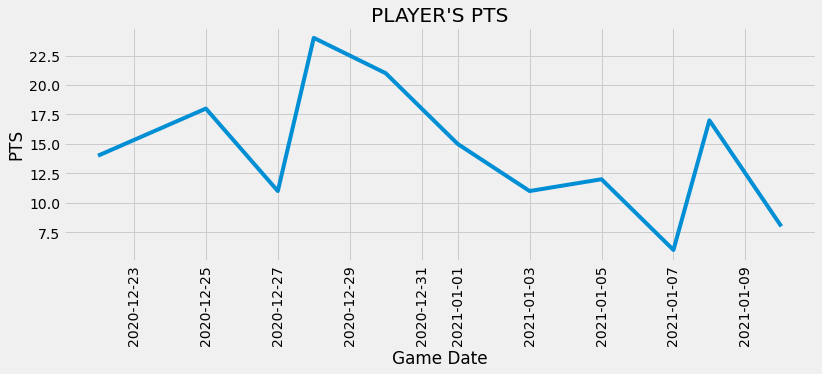

Daniel Theis


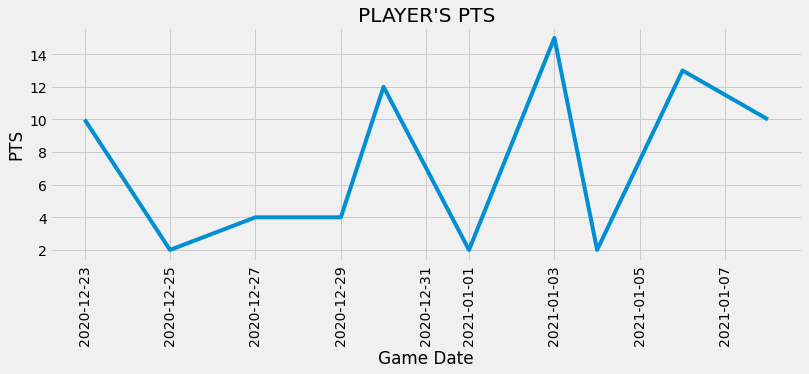

Will Barton


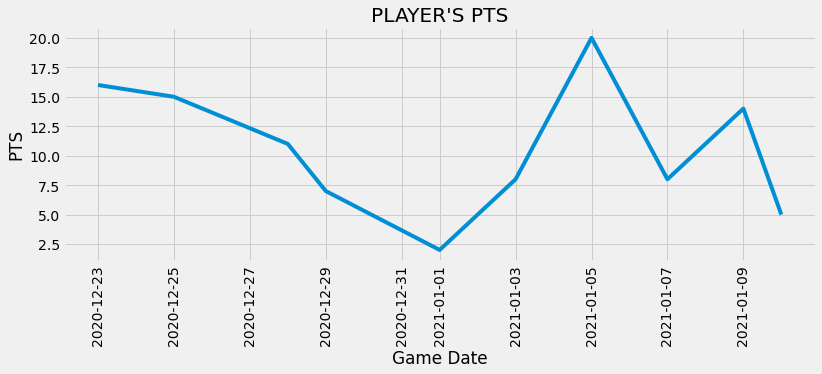

Cam Reddish


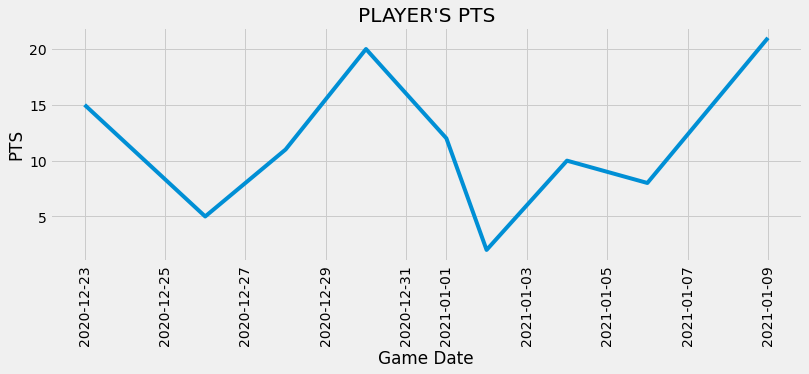

Bismack Biyombo


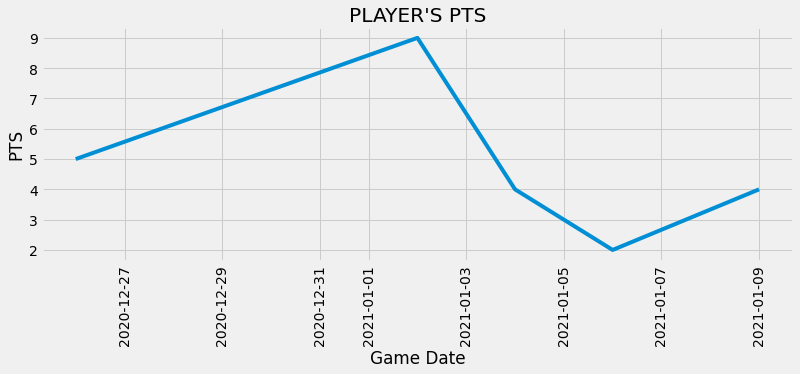

In [61]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='PTS', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S PTS')
    plt.xlabel('Game Date')
    plt.ylabel('PTS')
    plt.xticks(rotation=90)
    plt.show()
#PTS trend of my players

Damian Lillard


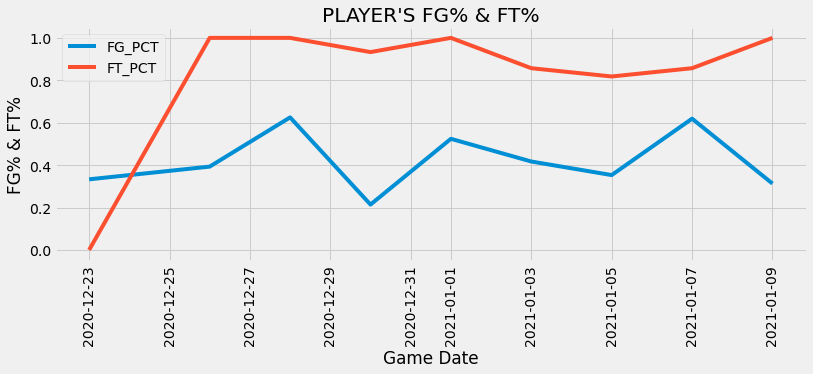

D'Angelo Russell


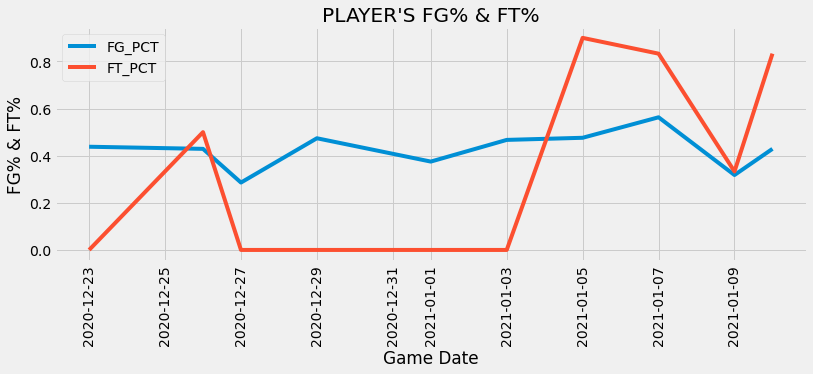

Marcus Smart


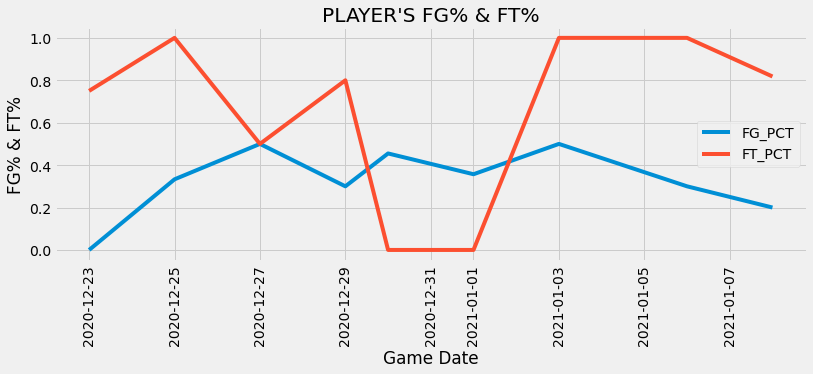

Tobias Harris


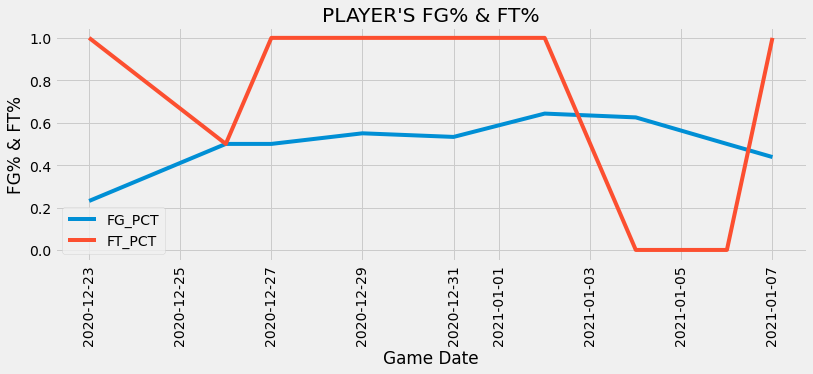

Bam Adebayo


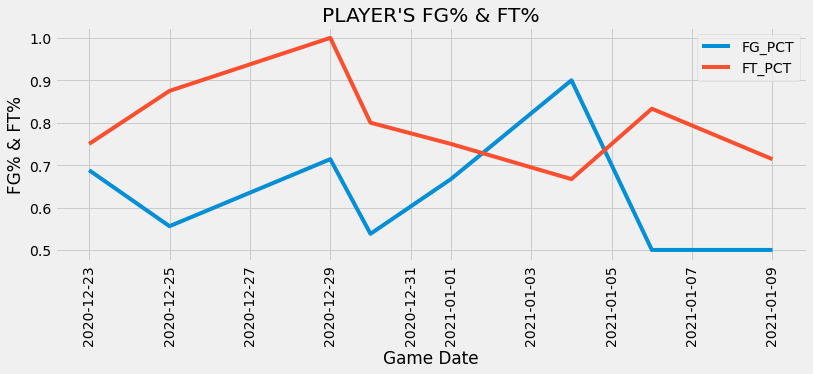

Al Horford


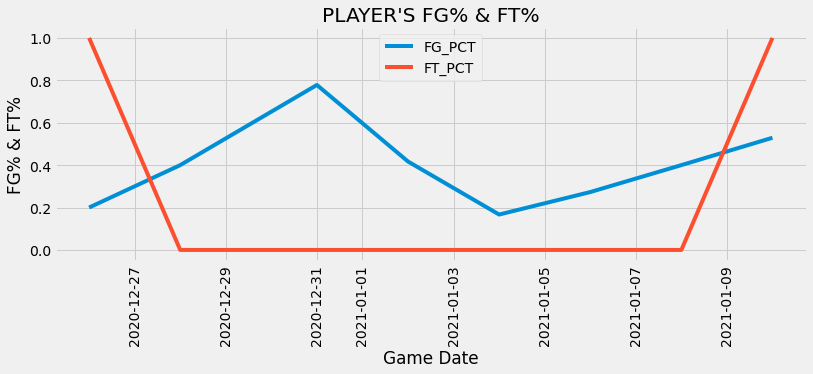

Jusuf Nurkic


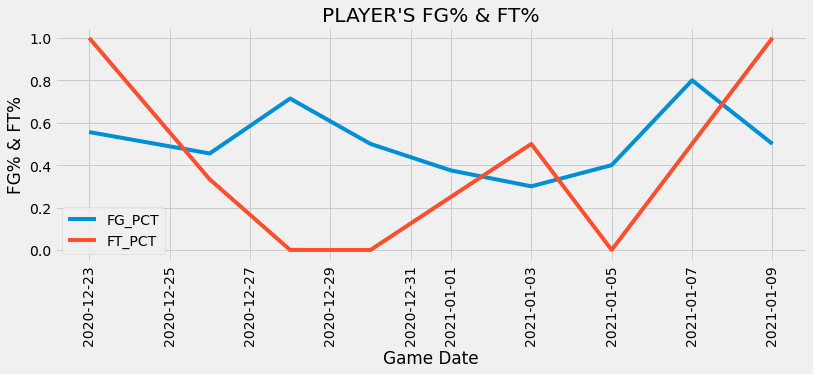

Thomas Bryant


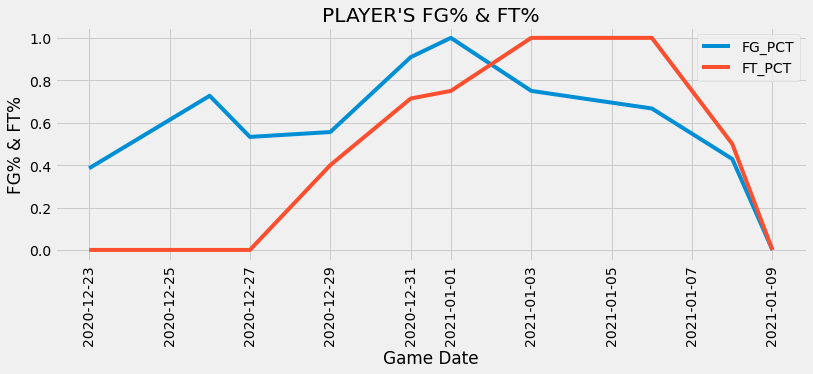

Dennis Schroder


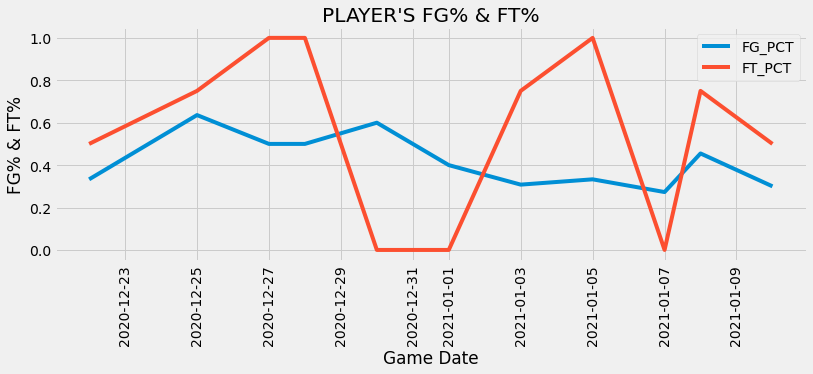

Daniel Theis


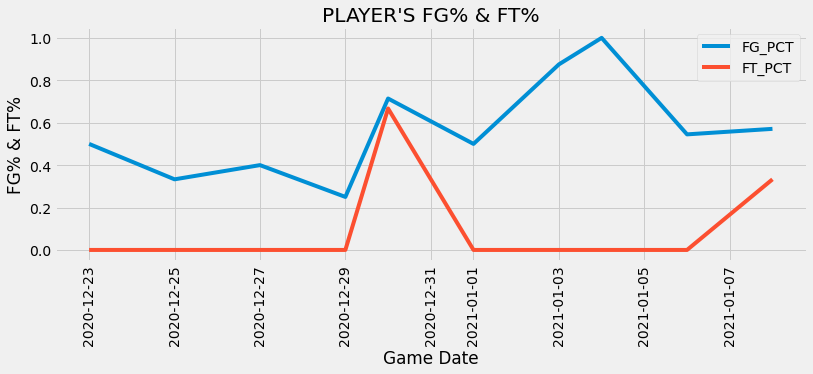

Will Barton


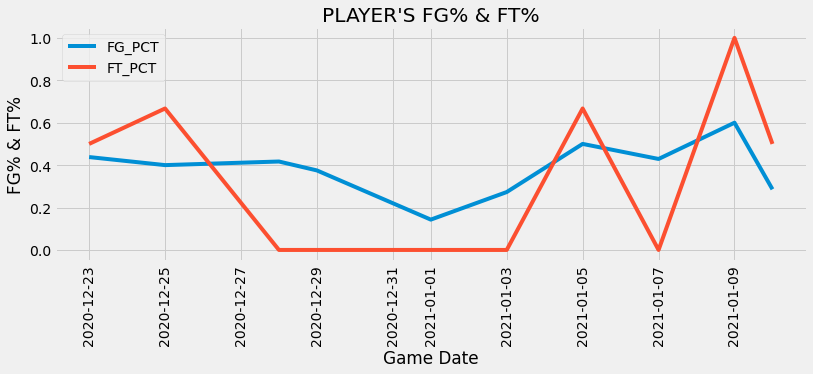

Cam Reddish


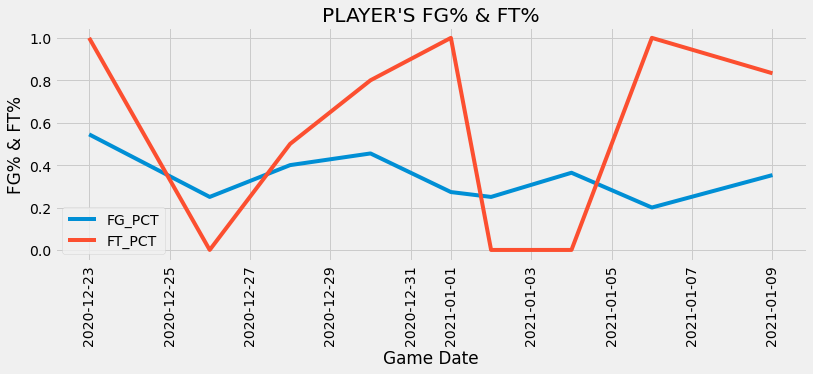

Bismack Biyombo


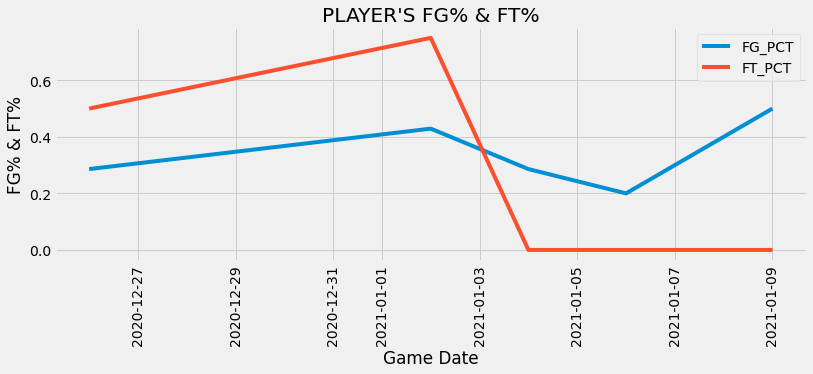

In [62]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='FT_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S FG% & FT%')
    plt.xlabel('Game Date')
    plt.ylabel('FG% & FT%')
    plt.xticks(rotation=90)
    plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
    plt.show()
#FG% and FT% trends of my players

Damian Lillard


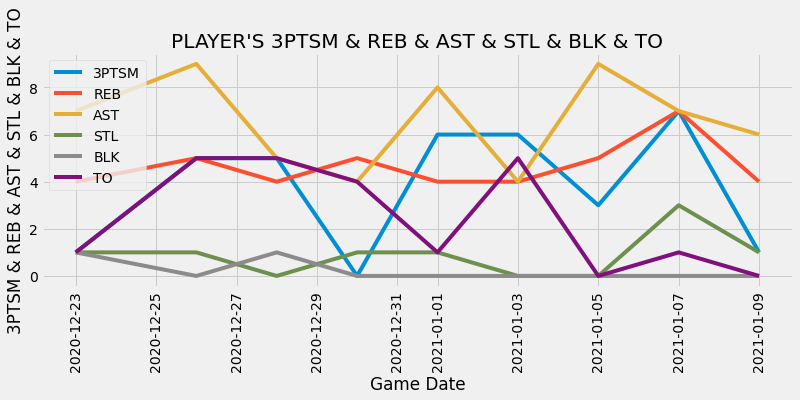

D'Angelo Russell


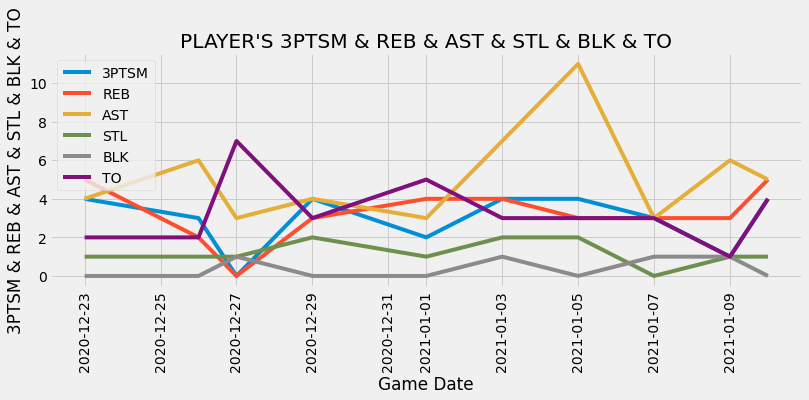

Marcus Smart


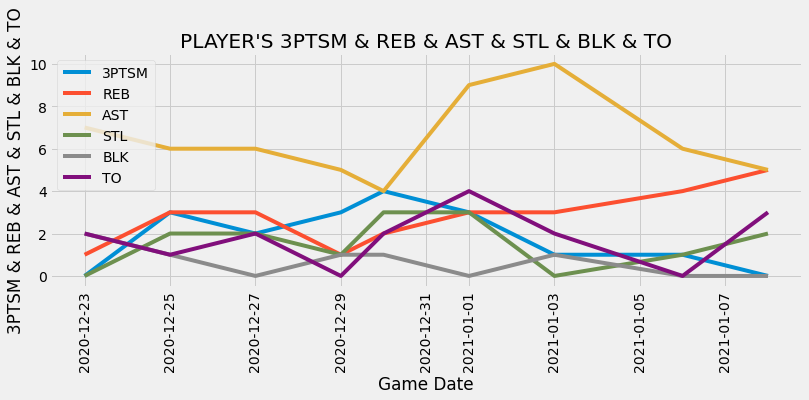

Tobias Harris


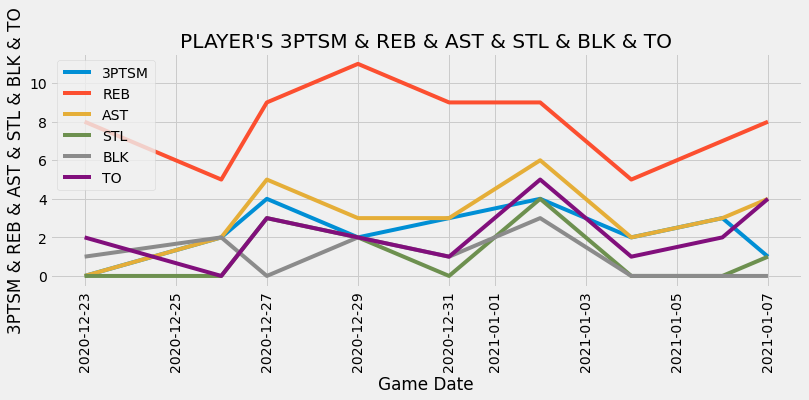

Bam Adebayo


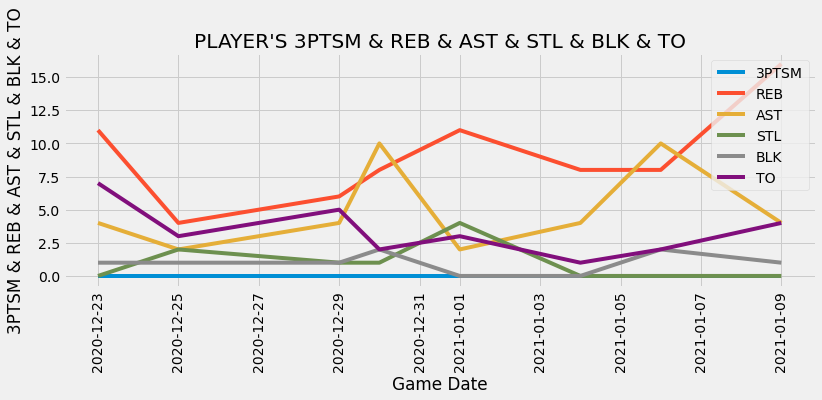

Al Horford


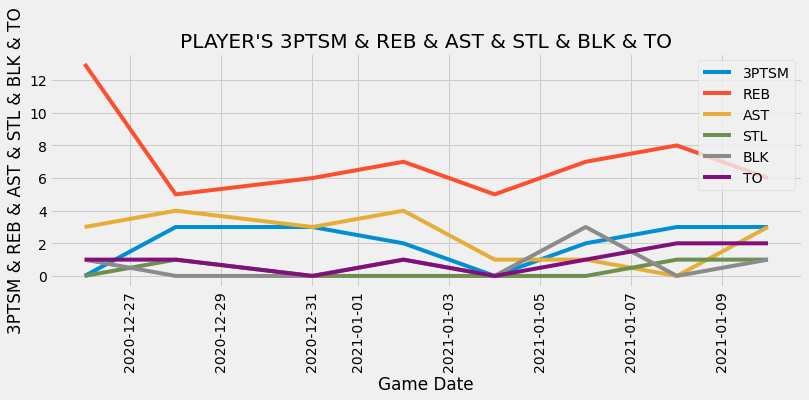

Jusuf Nurkic


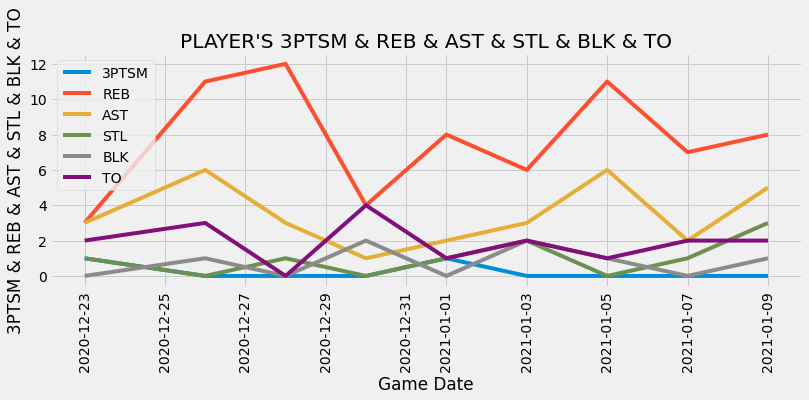

Thomas Bryant


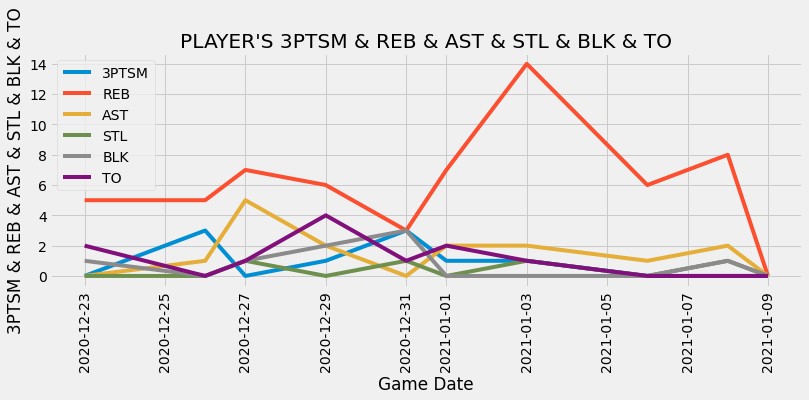

Dennis Schroder


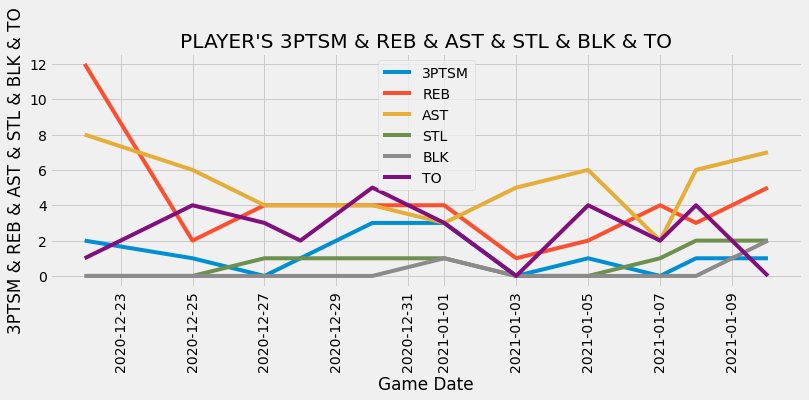

Daniel Theis


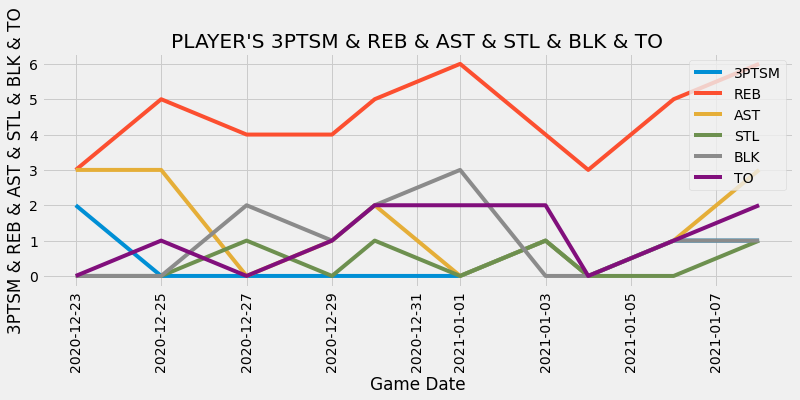

Will Barton


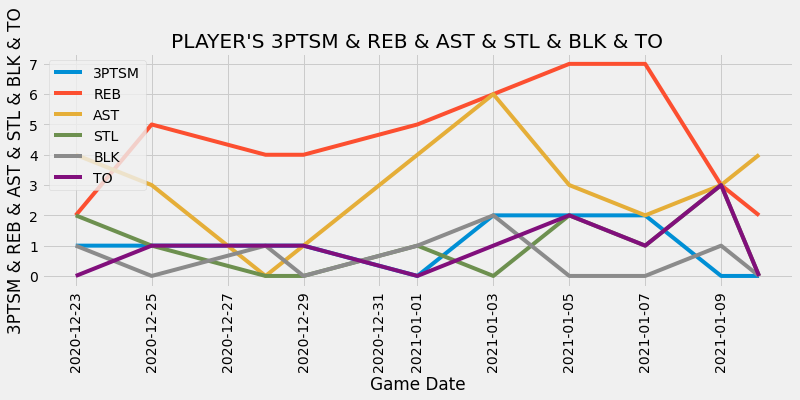

Cam Reddish


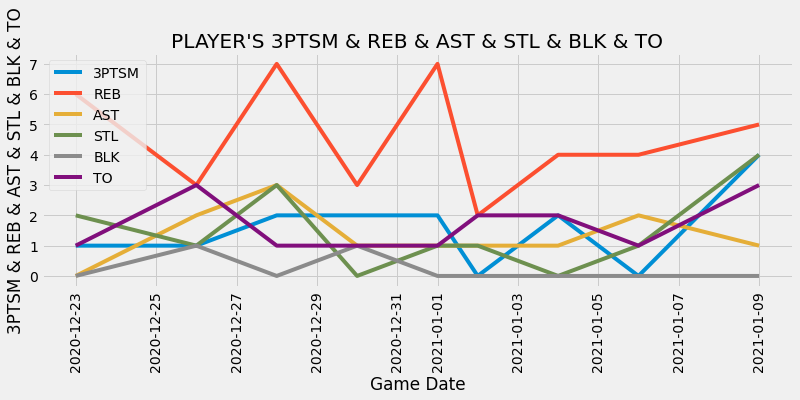

Bismack Biyombo


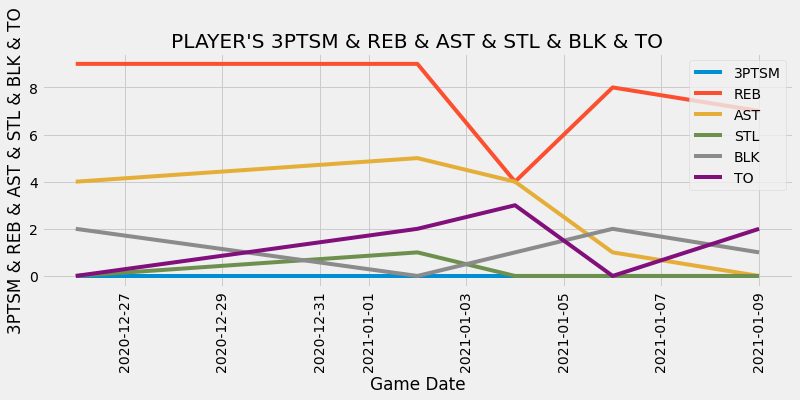

In [89]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG3M', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='REB', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='AST', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='STL', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='BLK', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='TO', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S 3PTSM & REB & AST & STL & BLK & TO')
    plt.xlabel('Game Date')
    plt.ylabel('3PTSM & REB & AST & STL & BLK & TO')
    plt.xticks(rotation=90)
    plt.legend(['3PTSM', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
    plt.show()
#3PTSM, REB, AST, STL, BLK, TO trends of my players

###Finding a player's stats in regular season

In [317]:
player = 'Hamidou Diallo'
player_id = find_players_by_full_name(player)[0]['id']
player_cumestats = CumeStatsPlayerGames(player_id=player_id)
player_cumestats_df = player_cumestats.get_data_frames()[0]

player_cumestats_df['DATE'] = '-'
player_cumestats_df['HOME'] = '-'
player_cumestats_df['AWAY'] = '-'
for i in range(0, len(player_cumestats_df.MATCHUP)):
    player_cumestats_df['DATE'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][0]
    player_cumestats_df['HOME'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][3]
    player_cumestats_df['AWAY'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][1]
    
player_cumestats_df['DATE'] = pd.to_datetime(player_cumestats_df['DATE'])
player_cumestats_df = player_cumestats_df.drop('MATCHUP', axis=1)

player_boxscore_df = []
for ids in player_cumestats_df.GAME_ID.values:
    df = BoxScoreTraditionalV2(ids).get_data_frames()[0]
    player_boxscore_df.append(df)
player_boxscore_df = pd.concat(player_boxscore_df)

player_boxscore_df = player_boxscore_df.loc[player_boxscore_df['PLAYER_ID'] == player_id]

final_df = pd.merge(player_boxscore_df, player_cumestats_df, how='inner', on='GAME_ID')
final_df = final_df.sort_values(by='DATE')

time.sleep(2)

In [318]:
final_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE,HOME,AWAY
8,0022000022,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,19:40,3.0,...,2.0,1.0,0.0,2.0,1.0,8.0,-9.0,2020-12-26,Hornets,Thunder
7,0022000043,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,19:52,3.0,...,1.0,1.0,1.0,0.0,2.0,7.0,-3.0,2020-12-28,Thunder,Jazz
6,0022000052,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,21:59,6.0,...,0.0,2.0,1.0,3.0,3.0,13.0,-1.0,2020-12-29,Thunder,Magic
5,0022000067,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,17:47,1.0,...,3.0,1.0,0.0,0.0,1.0,3.0,-15.0,2020-12-31,Thunder,Pelicans
4,0022000081,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,18:55,5.0,...,0.0,0.0,0.0,1.0,4.0,12.0,8.0,2021-01-02,Magic,Thunder
3,0022000096,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,17:08,3.0,...,1.0,0.0,0.0,2.0,2.0,9.0,-17.0,2021-01-04,Heat,Thunder
2,0022000114,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,20:48,4.0,...,3.0,1.0,1.0,1.0,0.0,9.0,-3.0,2021-01-06,Pelicans,Thunder
1,0022000125,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,29:03,8.0,...,2.0,1.0,0.0,1.0,2.0,23.0,18.0,2021-01-08,Knicks,Thunder
0,0022000143,1610612760,OKC,Oklahoma City,1628977,Hamidou Diallo,,,23:53,10.0,...,4.0,4.0,0.0,0.0,4.0,25.0,17.0,2021-01-10,Nets,Thunder


In [319]:
final_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'DATE', 'HOME', 'AWAY'],
      dtype='object')

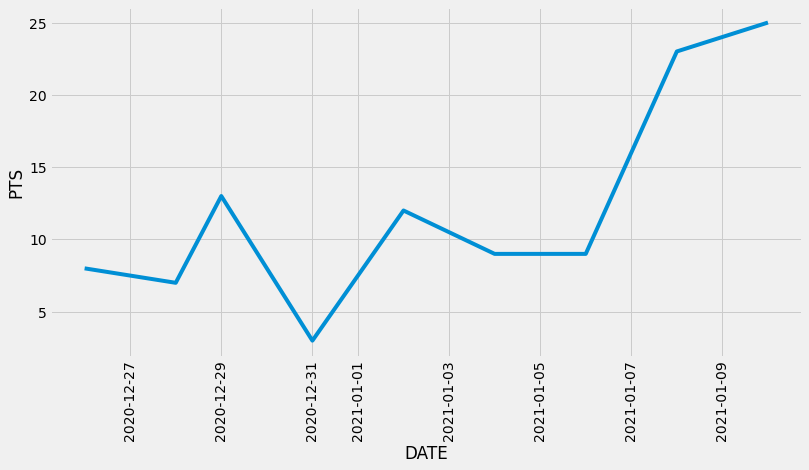

In [320]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='PTS', data=final_df)
plt.xticks(rotation=90)
plt.show()

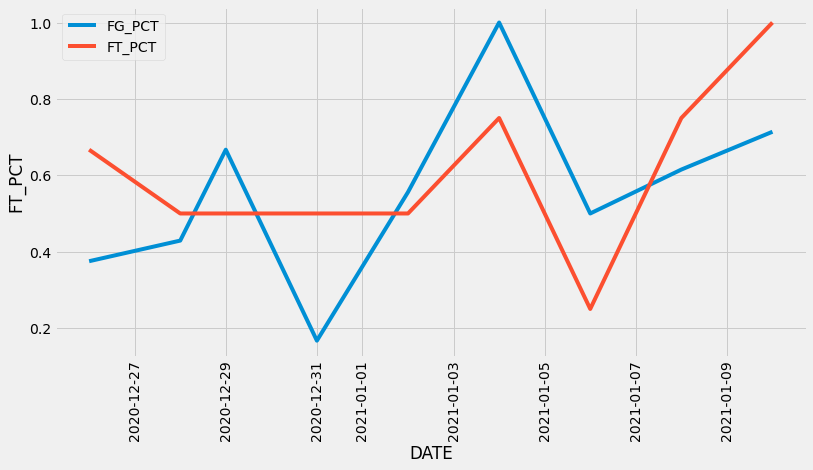

In [321]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG_PCT', data=final_df)
sns.lineplot(x='DATE', y='FT_PCT', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
plt.show()

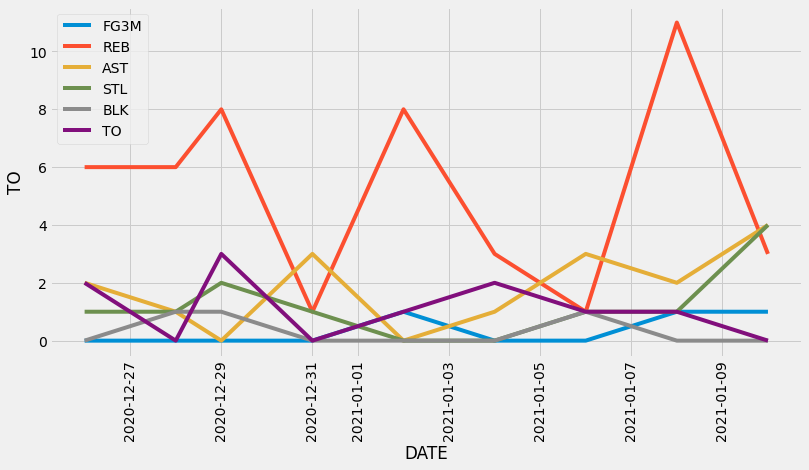

In [322]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG3M', data=final_df)
sns.lineplot(x='DATE', y='REB', data=final_df)
sns.lineplot(x='DATE', y='AST', data=final_df)
sns.lineplot(x='DATE', y='STL', data=final_df)
sns.lineplot(x='DATE', y='BLK', data=final_df)
sns.lineplot(x='DATE', y='TO', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG3M', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
plt.show()